In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch

np.set_printoptions(suppress=True)

from anchors import generate_anchors_np, generate_anchors_torch, plot_anchor_boxes

%matplotlib inline

In [2]:
feature_map = torch.zeros(size=(1, 3, 561, 728))
scales = torch.tensor([0.75, 0.5, 0.25])
ratios = torch.tensor([1, 2, 0.5])
anchors = generate_anchors_torch(feature_map, scales, ratios)
anchors = anchors.reshape(561, 728, 5, 4)
print(anchors[200, 200, 0, :])

tensor([-0.0136, -0.0176,  0.5644,  0.7324])


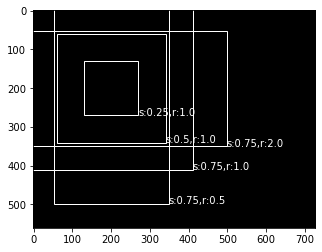

In [3]:
combos = [
    [ scales.numpy()[0], ratios.numpy()[0] ],
    [ scales.numpy()[1], ratios.numpy()[0] ],
    [ scales.numpy()[2], ratios.numpy()[0] ],
    [ scales.numpy()[0], ratios.numpy()[1] ],
    [ scales.numpy()[0], ratios.numpy()[2] ]
]
plot_anchor_boxes(feature_map.numpy(), anchors.numpy(), combos)

In [4]:
feature_map_np = np.zeros(shape=(1, 3, 561, 728))
scales = [0.75, 0.5, 0.25]
ratios = [1, 2, 0.5]
anchors_np = generate_anchors_np(feature_map_np, scales, ratios)
anchors_np = anchors_np.reshape(561, 728, 5, 4)
print(anchors_np[200, 200, 0, :])

(2042040, 4)
[0.08276099 0.1073975  0.46806319 0.6073975 ]


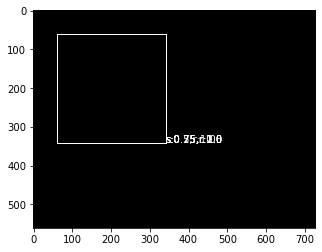

In [5]:
anchors = anchors.reshape(561, 728, 5, 4)
plot_anchor_boxes(feature_map_np, anchors_np, combos)
plt.show()

In [38]:
a = np.array([
    [1, 2],
    [3, 4]
]).T

b = a.repeat(3, axis=0)
print(b)

c = np.tile(a, 3)
c = np.array([ c[idx].reshape(-1, 2) for idx in range(c.shape[0]) ])
print(c.shape)
print(c)

[[1 3]
 [1 3]
 [1 3]
 [2 4]
 [2 4]
 [2 4]]
(2, 3, 2)
[[[1 3]
  [1 3]
  [1 3]]

 [[2 4]
  [2 4]
  [2 4]]]


In [15]:
a = torch.tensor([
    [1, 2],
    [3, 4]
]).T

b = a.repeat(3, 1)
print(b.size())
print(b.numpy())

c = a.repeat_interleave(3, 0)
print(c)

torch.Size([6, 2])
[[1 3]
 [2 4]
 [1 3]
 [2 4]
 [1 3]
 [2 4]]
tensor([[1, 3],
        [1, 3],
        [1, 3],
        [2, 4],
        [2, 4],
        [2, 4]])
